<a href="https://colab.research.google.com/github/geunkim/Artificial-Intelligence/blob/master/Code/k_Nearest_Neighbors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **K-Nearest Neighbor Classification**

KNN 설명 추가 




## **I. 매우 단순한 예제**

### **1. 필요한 라이브러리 임포트** 

In [0]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt

### **2. 관련함수 구현** 

* euclidean_distance(row1, row2)
  - row1과 row2 간의 유클리디언 거리 계산

 

In [0]:
# calculate the Euclidean distance between two vectors
# row = [x, y, type]

def euclidean_distance(row1, row2):
	distance = 0.0
	for i in range(len(row1)-1):
		distance += (row1[i] - row2[i])**2
	return sqrt(distance)

* get_neighbors(train, test_row, num_neighbors)
  - train 데이터 중 test_row에서 가장 근접한 노드 중 num_neighbors 개를 반환 

In [0]:
## num_neighbors: 

def get_neighbors(train, test_row, num_neighbors):
	distances = list()
	for train_row in train:
		dist = euclidean_distance(test_row, train_row)
		distances.append((train_row, dist))
	distances.sort(key=lambda tup: tup[1])
	neighbors = list()
	for i in range(num_neighbors):
		neighbors.append(distances[i][0])
	return neighbors

* dataplot(data)
  - data list를 입력받아 2차원 좌표로 그리기

In [0]:
def dataplot(data):
  for row in data:
	  if row[2] == 1:
		  plt.plot(row[0], row[1], 'ro', label = 'class 1')
	  else:
		  plt.plot(row[0], row[1], 'bo', label = 'class 2')

* predict_classification((train, test_row, num_neighbors)
  - train 데이터에서 test_row 에 대해서 num_neighbors 개의 인접 데이터를 이용하여 예측

In [0]:
# Make a classification prediction with neighbors
def predict_classification(train, test_row, num_neighbors):
	neighbors = get_neighbors(train, test_row, num_neighbors)
	for neighbor in neighbors:
		print(neighbor)
	output_values = [row[-1] for row in neighbors]
	prediction = max(set(output_values), key=output_values.count)
	return prediction

### **3. 데이터 셋 만들기** 

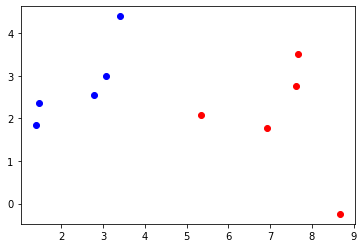

In [70]:
# Make data set

# Test distance function
# [x, y, type]

dataset = [[2.7810836,2.550537003,0],
	[1.465489372,2.362125076,0],
	[3.396561688,4.400293529,0],
	[1.38807019,1.850220317,0],
	[3.06407232,3.005305973,0],
	[7.627531214,2.759262235,1],
	[5.332441248,2.088626775,1],
	[6.922596716,1.77106367,1],
	[8.675418651,-0.242068655,1],
	[7.673756466,3.508563011,1]]

dataplot(dataset)

### (검증용 코드) 이미 구현한 함수들을 검증하는 코드**

* 임의의 점 (3, 3)을 기준으로 거리 구하는 기능 검증용 코드

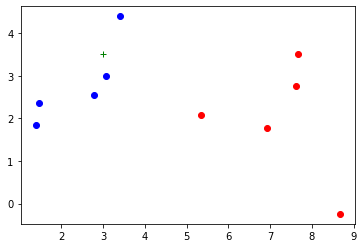

[ 2.7810836 , 2.550537003 ] : 0.2189163999999999
[ 1.465489372 , 2.362125076 ] : 1.534510628
[ 3.396561688 , 4.400293529 ] : 0.3965616879999998
[ 1.38807019 , 1.850220317 ] : 1.61192981
[ 3.06407232 , 3.005305973 ] : 0.06407232000000018
[ 7.627531214 , 2.759262235 ] : 4.627531214
[ 5.332441248 , 2.088626775 ] : 2.3324412480000003
[ 6.922596716 , 1.77106367 ] : 3.922596716
[ 8.675418651 , -0.242068655 ] : 5.675418650999999
[ 7.673756466 , 3.508563011 ] : 4.673756466


In [72]:
row0 = [3,3]

dataplot(dataset)	
plt.plot(row0[0], row[1], 'g+')
plt.show()


## distance 출력
for row in dataset:
	distance = euclidean_distance(row0, row)
	print("[", row[0], ",", row[1], "]", ':', distance)
  

* 임의의 점 (3, 3)에서 가까운 데이터 3개를 구하는 검증욜 코드 

train 변수는 데이터 셋, test_row는 측정하고자 하는 좌표, num_neighbor 변수가 K를 의미 

In [53]:
neighbors = get_neighbors(dataset, row0, 3)
for neighbor in neighbors:
	print(neighbor)

[3.06407232, 3.005305973, 0]
[2.7810836, 2.550537003, 0]
[3.396561688, 4.400293529, 0]


### **4. 새로운 데이터에 대한 예측**

테스트 데이터: (3, 4)

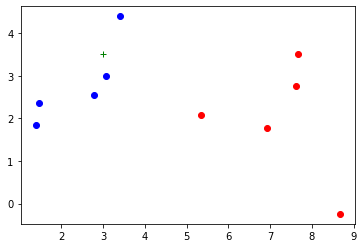

[3.396561688, 4.400293529, 0]
[3.06407232, 3.005305973, 0]
[2.7810836, 2.550537003, 0]
Expected 0, Got 0.


In [73]:
row0 = [3, 4, 0]

dataplot(dataset)	
plt.plot(row0[0], row[1], 'g+')
plt.show()

prediction = predict_classification(dataset, row0, 3)
print('Expected %d, Got %d.' % (row0[-1], prediction))

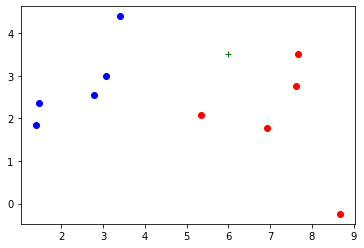

[7.673756466, 3.508563011, 1]
[3.396561688, 4.400293529, 0]
[7.627531214, 2.759262235, 1]
Expected 0, Got 1.


In [74]:
row0 = [6,5,0]

dataplot(dataset)	
plt.plot(row0[0], row[1], 'g+')
plt.show()

prediction = predict_classification(dataset, row0, 3)
print('Expected %d, Got %d.' % (row0[-1], prediction))

## **II. 새로운 예제**

In [75]:
num_points_each_cluster = 100
mu1 = [-0.4, 3]
covar1 = [[1.3,0],[0,1]]
mu2 = [0.5, 0.75]
covar2 = [[2.2,1.2],[1.8,2.1]]
X1 = np.random.multivariate_normal(mu1, covar1, num_points_each_cluster)
X2 = np.random.multivariate_normal(mu2, covar2, num_points_each_cluster)
y1 = np.ones(num_points_each_cluster)
y2 = np.zeros(num_points_each_cluster)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: covariance is not positive-semidefinite.
  import sys
